In [770]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

In [771]:
x,y = make_classification(n_samples = 1000,n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [772]:
x

array([[-0.20535429, -2.86386516],
       [-0.31575309, -0.87698029],
       [-0.25640262, -2.47773077],
       ...,
       [-0.42153598,  0.16589003],
       [ 0.37325639,  0.47467773],
       [-0.06012331, -1.30409991]])

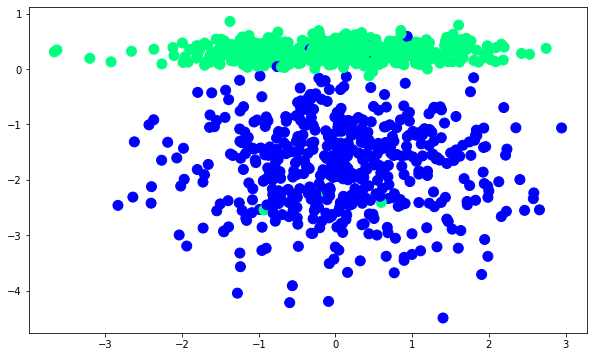

In [773]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [774]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [775]:
def step(z):
    return 1 if z>0 else 0

In [776]:
intercept_,coef_ = perceptron(X,y)

In [777]:
print(coef_)
print(intercept_)

[0.36331447 1.53674953]
0.5000000000000001


In [778]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [779]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

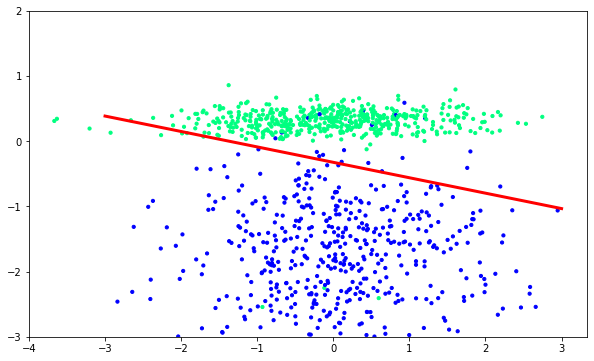

In [780]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,2)

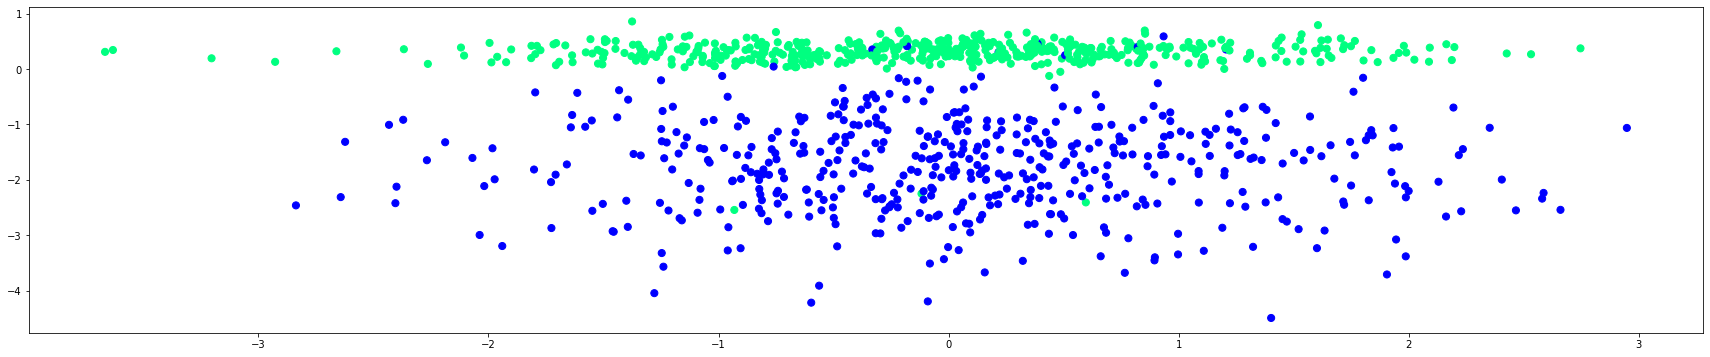

In [781]:
plt.figure(figsize=(30,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=50)

In [782]:
data = pd.DataFrame(x)
data.columns = ['x1','x2']
data

,x1,x2
0,-0.205354,-2.863865
1,-0.315753,-0.876980
2,-0.256403,-2.477731
3,-0.619268,-2.178505
4,-1.203394,0.078740
...,...,...
995,1.098652,0.077295
996,1.765977,0.505602
997,-0.421536,0.165890
998,0.373256,0.474678


In [783]:
lis = []
for i in range(0,len(data)):
    lis.append(1)

In [732]:
data['x0']=lis

In [784]:
data.insert(0, 'x0', lis)

In [785]:
data['label']=y

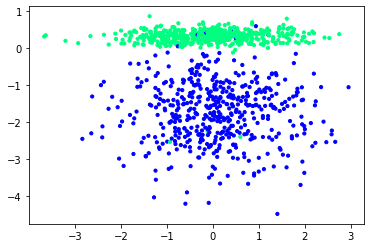

In [788]:
plt.scatter(data['x1'],data['x2'],c=y,cmap='winter',s=10)

In [800]:
def perceptron(data):
    weight = np.ones(data.drop('label',axis =1).shape[1])
    lr =0.1
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat= step(np.dot(data.drop('label',axis =1).iloc[j],weight))
        weight = weight +lr*(data.iloc[j]['label']-y_hat)*data.drop('label',axis =1).iloc[j]
    return weight

In [801]:
def step(z):
    return 1 if z>0 else 0

In [802]:
weight = perceptron(data)

In [804]:
weight

x0    0.600000
x1    0.474499
x2    1.455479
dtype: float64

In [809]:
intercept_,coef_ = weight[0],weight[1:]
intercept_,coef_

(0.6000000000000001,
 x1    0.474499
 x2    1.455479
 dtype: float64)

In [810]:
slope = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [811]:
slope,b

(-0.3260090008381662, -0.41223533823962855)

(-3.0, 2.0)

<Figure size 2160x432 with 0 Axes>

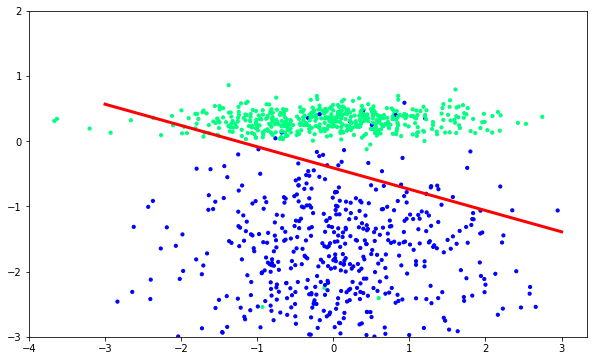

In [812]:
plt.figure(figsize=(30,6))
x_input = np.linspace(-3,3,100)
y_line = slope*x_input+b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_line,color='red',linewidth=3)
plt.scatter(data['x1'],data['x2'],c=y,cmap='winter',s=10)
plt.ylim(-3,2)

In [822]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(data.drop('label',axis =1),data['label'])

LogisticRegression()

In [823]:
lor.coef_

array([[ 1.88023026e-07, -1.10662325e-01,  4.89209096e+00]])

In [824]:
lor.intercept_

array([1.59616151])

In [825]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [826]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

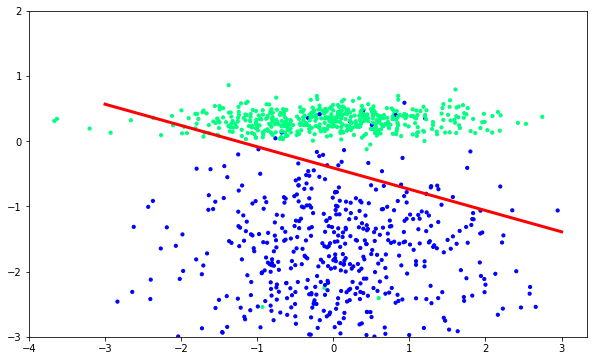

In [827]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_line,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(data['x1'],data['x2'],c=y,cmap='winter',s=10)
plt.ylim(-3,2)